In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from statannot import add_stat_annotation
from scipy.stats import mannwhitneyu

In [2]:
cutoff = 0
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/Realdata/response_prediction/BL22/boxplots/BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkladjustedScore_minus_avgdivbyCTFRAG_CSxOut.txt_melanoma_noah_Response_encodedpretx.txt'
data = pd.read_csv(file, sep='\t', index_col=0, encoding= 'unicode_escape')
df = pd.DataFrame(data)

df

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,em8,Eo,Tregs,em4,ed8,Mg,cm4,Er,mB,ResponseEncoded
Mixture,,,,,,,,,,,,,,,,,,,,,
tot-YUCLUE_20-3998-cfDNA,0.047142,0.045919,0.030953,0.083441,0.081213,0.073955,0.073482,0.062766,0.070022,0.082979,...,0.049246,0.139789,0.077803,0.062864,0.089801,0.300381,0.061734,0.248213,0.056865,1
tot-YUMARS_15-3443-cfDNA,0.055439,0.061599,0.046192,0.128325,0.090362,0.118758,0.074547,0.074854,0.076686,0.071958,...,0.048532,0.138619,0.058345,0.034130,0.076991,0.282482,0.036549,0.240139,0.037875,0
tot-YUMICRO_20-4006-cfDNA,0.071174,0.143216,0.036599,0.102652,0.178985,0.072328,0.117363,0.110423,0.109006,0.088632,...,0.045744,0.093073,0.063104,0.046843,0.041382,0.225051,0.093579,0.115868,0.051035,1
tot-YUMOTE_17-3755-cfDNA,0.054416,0.071790,0.047496,0.083231,0.102359,0.092754,0.104072,0.120752,0.096964,0.083204,...,0.047479,0.100288,0.060127,0.043571,0.041631,0.297734,0.059330,0.194551,0.081799,1
tot-YUPRAF_19-3925-cfDNA,0.051588,0.069508,0.065360,0.113798,0.052444,0.127384,0.085173,0.083226,0.078528,0.088162,...,0.080193,0.138554,0.063134,0.084466,0.082407,0.180821,0.077413,0.155470,0.053942,0
tot-YUREIL_17-3713-cfDNA,0.049746,0.036871,0.049980,0.094341,0.042759,0.105297,0.068033,0.059988,0.069007,0.078138,...,0.025011,0.086966,0.049186,0.041251,0.056343,0.218193,0.045497,0.201742,0.056234,0
tot-YUSTRAW_20-4002-cfDNA,0.048768,0.055886,0.029846,0.124505,0.042552,0.092563,0.067691,0.052138,0.070260,0.069958,...,0.025385,0.125847,0.056472,0.037502,0.067804,0.178233,0.053428,0.125734,0.045527,0
tot-YUTAUR_19-3926-cfDNA,0.040885,0.023596,0.038292,0.060977,0.059791,0.062151,0.046403,0.035177,0.043406,0.051047,...,0.038995,0.067405,0.038230,0.023246,0.066276,0.151325,0.033961,0.110148,0.071457,1
tot-YUTHEA_20-4000-cfDNA,0.055914,0.058524,0.054953,0.103133,0.108493,0.086785,0.091219,0.085925,0.084632,0.087027,...,0.036822,0.120978,0.085872,0.085402,0.091146,0.404789,0.046982,0.321342,0.053298,0


In [3]:
fol = file+'_boxplots' + str(cutoff)
os.mkdir(fol)

In [4]:
conditions = [(df['ResponseEncoded'] <= cutoff), (df['ResponseEncoded'] > cutoff)]
values = ['Response <= ' + str(cutoff), 'Response > ' + str(cutoff)]
df['ResponseEncodedNew'] = np.select(conditions, values)
df

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,Eo,Tregs,em4,ed8,Mg,cm4,Er,mB,ResponseEncoded,ResponseEncodedNew
Mixture,,,,,,,,,,,,,,,,,,,,,
tot-YUCLUE_20-3998-cfDNA,0.047142,0.045919,0.030953,0.083441,0.081213,0.073955,0.073482,0.062766,0.070022,0.082979,...,0.139789,0.077803,0.062864,0.089801,0.300381,0.061734,0.248213,0.056865,1,Response > 0
tot-YUMARS_15-3443-cfDNA,0.055439,0.061599,0.046192,0.128325,0.090362,0.118758,0.074547,0.074854,0.076686,0.071958,...,0.138619,0.058345,0.034130,0.076991,0.282482,0.036549,0.240139,0.037875,0,Response <= 0
tot-YUMICRO_20-4006-cfDNA,0.071174,0.143216,0.036599,0.102652,0.178985,0.072328,0.117363,0.110423,0.109006,0.088632,...,0.093073,0.063104,0.046843,0.041382,0.225051,0.093579,0.115868,0.051035,1,Response > 0
tot-YUMOTE_17-3755-cfDNA,0.054416,0.071790,0.047496,0.083231,0.102359,0.092754,0.104072,0.120752,0.096964,0.083204,...,0.100288,0.060127,0.043571,0.041631,0.297734,0.059330,0.194551,0.081799,1,Response > 0
tot-YUPRAF_19-3925-cfDNA,0.051588,0.069508,0.065360,0.113798,0.052444,0.127384,0.085173,0.083226,0.078528,0.088162,...,0.138554,0.063134,0.084466,0.082407,0.180821,0.077413,0.155470,0.053942,0,Response <= 0
tot-YUREIL_17-3713-cfDNA,0.049746,0.036871,0.049980,0.094341,0.042759,0.105297,0.068033,0.059988,0.069007,0.078138,...,0.086966,0.049186,0.041251,0.056343,0.218193,0.045497,0.201742,0.056234,0,Response <= 0
tot-YUSTRAW_20-4002-cfDNA,0.048768,0.055886,0.029846,0.124505,0.042552,0.092563,0.067691,0.052138,0.070260,0.069958,...,0.125847,0.056472,0.037502,0.067804,0.178233,0.053428,0.125734,0.045527,0,Response <= 0
tot-YUTAUR_19-3926-cfDNA,0.040885,0.023596,0.038292,0.060977,0.059791,0.062151,0.046403,0.035177,0.043406,0.051047,...,0.067405,0.038230,0.023246,0.066276,0.151325,0.033961,0.110148,0.071457,1,Response > 0
tot-YUTHEA_20-4000-cfDNA,0.055914,0.058524,0.054953,0.103133,0.108493,0.086785,0.091219,0.085925,0.084632,0.087027,...,0.120978,0.085872,0.085402,0.091146,0.404789,0.046982,0.321342,0.053298,0,Response <= 0


In [5]:
#df=df.sort_values(by=['ResponseEncoded'])
#df.head()

Response > 0 v.s. Response <= 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.081e-01 U_stat=8.000e+01
Response > 0 v.s. Response <= 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.748e-01 U_stat=6.700e+01
Response > 0 v.s. Response <= 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.742e-01 U_stat=6.100e+01
Response > 0 v.s. Response <= 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.324e-01 U_stat=4.100e+01
Response > 0 v.s. Response <= 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.715e-01 U_stat=5.500e+01
Response > 0 v.s. Response <= 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.652e-01 U_stat=3.800e+01
Response > 0 v.s. Response <= 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.226e-01 U_stat=6.600e+01
Response > 0 v.s. Response <= 0: Mann-Whitney-Wilcoxon test two-sided with Bonferro

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


Response > 0 v.s. Response <= 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.228e-01 U_stat=6.200e+01


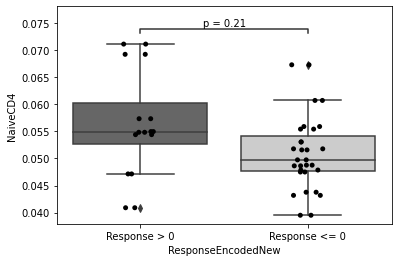

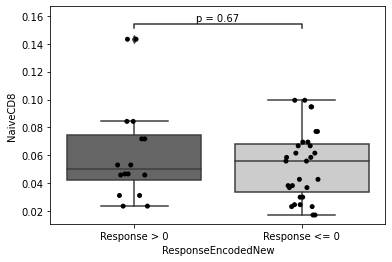

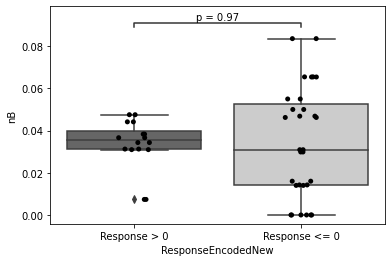

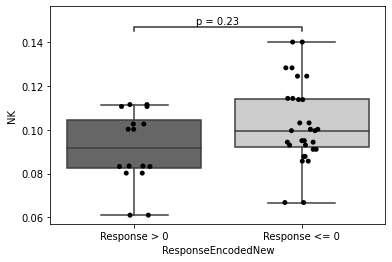

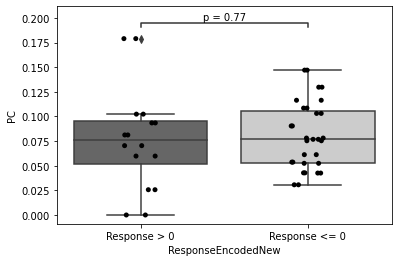

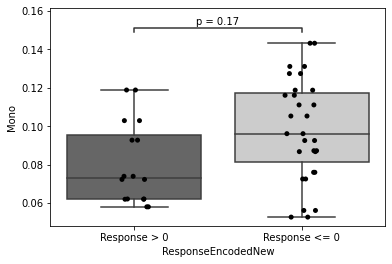

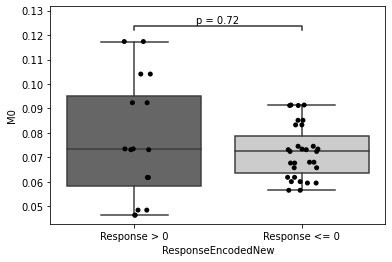

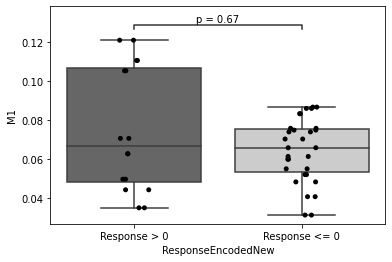

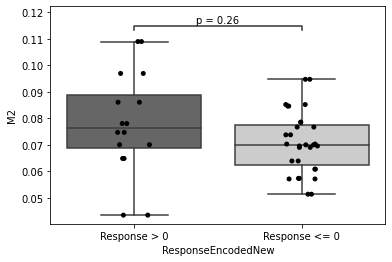

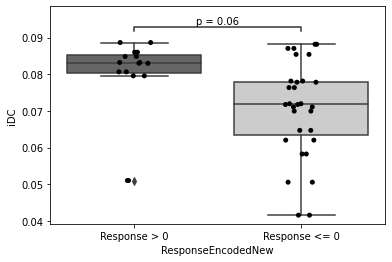

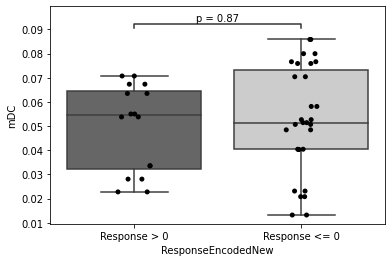

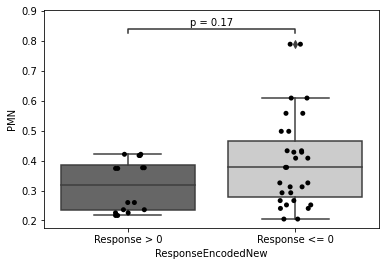

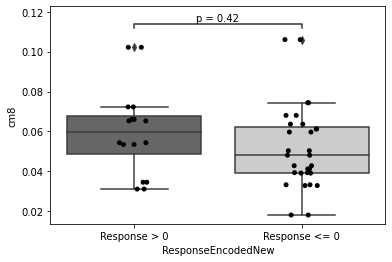

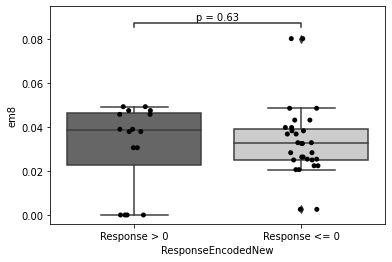

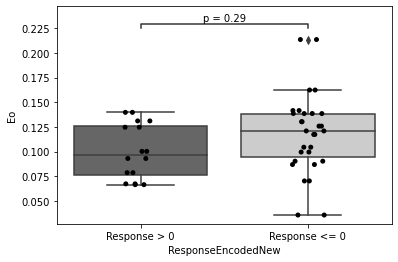

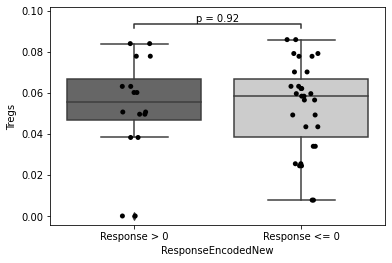

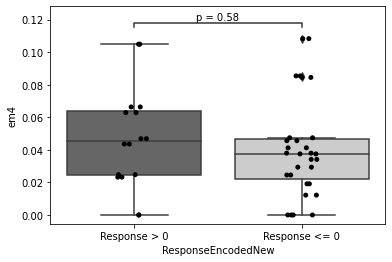

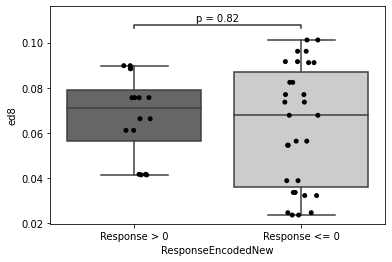

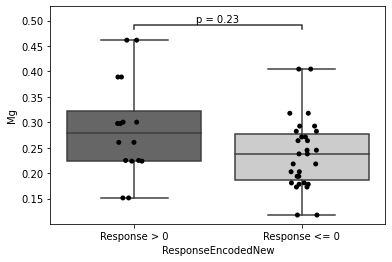

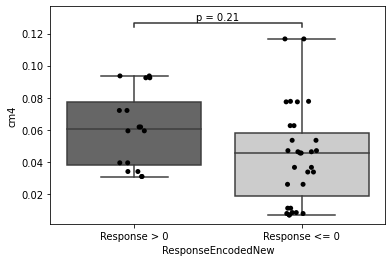

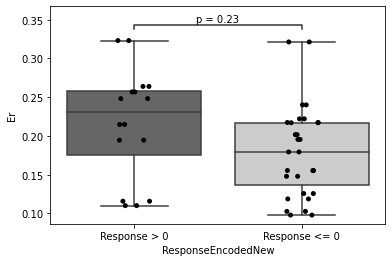

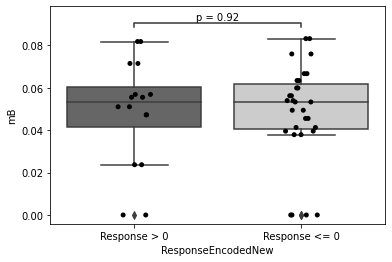

In [6]:
p_vals = {}
for cell in df.columns:
    p_val_list = []
    if cell not in ['ResponseEncoded', 'ResponseEncodedNew']:
        fig, ax = plt.subplots(1, 1)
        sns.boxplot(x='ResponseEncodedNew', y=cell, data=df, ax=ax, palette=[(0.4, 0.4, 0.4), (0.8, 0.8, 0.8)])
        add_stat_annotation(ax, data=df, x='ResponseEncodedNew', y=cell,
                    box_pairs=[(values[0], values[1])],
                    test='Mann-Whitney', text_format='simple', loc='inside', verbose=2)
        for i, toxicity in enumerate(values):
            y = np.array(df[df['ResponseEncodedNew'] == toxicity][cell])
            p_val_list.append(y)
            x = np.random.normal(i, 0.04, size=len(y))
            #plt.scatter(x, y, c='k')
            
            #################################irf################
            sns.stripplot(x = 'ResponseEncodedNew',
              y = cell,color='black',
              data = df)
        p_vals[cell] = [mannwhitneyu(p_val_list[0], p_val_list[1], alternative='two-sided')[1]]
        plt.savefig(fol + '/' + cell + '.pdf', bbox_inches='tight')

In [7]:
df_pvals = pd.DataFrame.from_dict(p_vals, orient='index', columns=['p-value (MWU)'])
df_pvals.to_csv(file + '_pvals.txt', sep='\t')